In [31]:
# Analysis for Round 1 Data

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import helpers
import os

In [32]:
# PART 1: Load and Prepare Data
log_file_path = 'data/round1.log'  # Update with actual path

# Verifying the file exists
if not os.path.exists(log_file_path):
    raise FileNotFoundError(f"File not found at {log_file_path}. Please check the path.")

# Reading the log file
with open(log_file_path, 'r') as file:
    lines = file.readlines()

# Extracting entries containing "exceeded limit"
parsed_lines = [line.strip() for line in lines if "exceeded limit" in line]

print(f"Extracted {len(parsed_lines)} entries with 'exceeded limit'.")



Extracted 3377 entries with 'exceeded limit'.


In [33]:
# PART 2: Data Extraction and Cleaning
extracted_data = []
for line in parsed_lines:
    product_match = re.search(r'product (\w+)', line)
    if product_match:
        extracted_data.append({
            "product": product_match.group(1)
        })

# Creating DataFrame
data = pd.DataFrame(extracted_data)

if data.empty:
    raise ValueError("No valid data extracted. Please check the log file format.")

# Display basic data info
print("\nData Information:")
print(data.info())





Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3377 entries, 0 to 3376
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   product  3377 non-null   object
dtypes: object(1)
memory usage: 26.5+ KB
None


In [34]:
# PART 3: Load and Wrangle Data using Helpers
chosen_backtest = 'data/round1.log'
content = open(log_file_path, 'r').readlines()
trades_df, activity_logs_df, sandbox_logs = helpers.wrangle_backtest(content)

# Selecting Specific Instrument
instrument = "AMETHYSTS"
ob = activity_logs_df[activity_logs_df['product'] == instrument].copy()

# Converting price columns to numeric (in case they are strings)
price_columns = ['bid_price_1', 'ask_price_1', 'bid_volume_1', 'ask_volume_1']
for col in price_columns:
    ob[col] = pd.to_numeric(ob[col], errors='coerce')

# Dropping rows with missing values
ob.dropna(subset=price_columns, inplace=True)



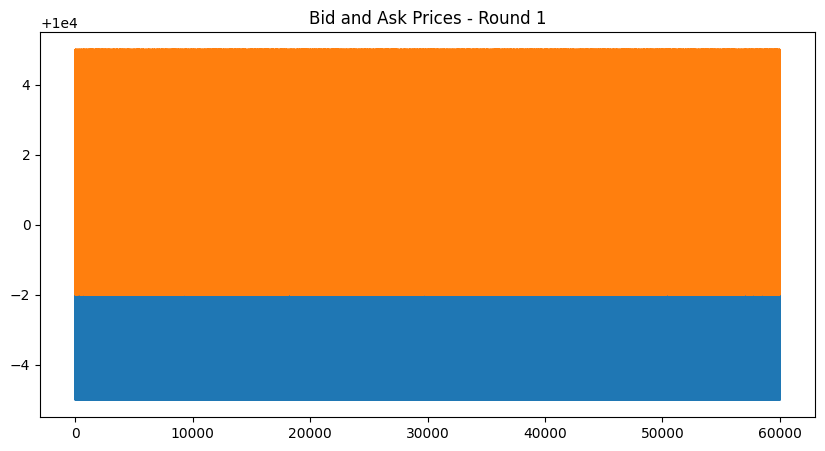

In [35]:
# PART 4: Basic Visualization - Bid, Ask, Mid, and VWAP
plt.figure(figsize=(10, 5))
plt.plot(ob['bid_price_1'], label='bid_price')
plt.plot(ob['ask_price_1'], label='ask_price')
plt.title('Bid and Ask Prices - Round 1')
plt.show()

# Calculating Mid Prices, Spread, and VWAP
ob['mid'] = (ob['bid_price_1'] + ob['ask_price_1']) / 2
ob['spread'] = ob['ask_price_1'] - ob['bid_price_1']

# Calculating VWAP (Volume-Weighted Average Price)
ob['VWAP'] = (ob['bid_price_1'] * ob['bid_volume_1'] + ob['ask_price_1'] * ob['ask_volume_1']) / (ob['bid_volume_1'] + ob['ask_volume_1'])



In [36]:
# PART 5: Advanced Statistical Analysis
print("\nAdvanced Statistical Analysis")
statistics = ob[['bid_price_1', 'ask_price_1', 'mid', 'VWAP', 'spread']].describe()
print(statistics)




Advanced Statistical Analysis
0       bid_price_1   ask_price_1           mid          VWAP        spread
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000
mean    9996.609633  10003.383467   9999.996550   9999.990490      6.773833
std        1.937861      1.949362      1.496592      2.011796      2.480219
min     9995.000000   9998.000000   9996.500000   9995.096774      2.000000
25%     9995.000000  10004.000000  10000.000000  10000.000000      6.000000
50%     9996.000000  10004.000000  10000.000000  10000.000000      8.000000
75%     9996.000000  10005.000000  10000.000000  10000.000000      8.000000
max    10002.000000  10005.000000  10003.500000  10005.000000     10.000000


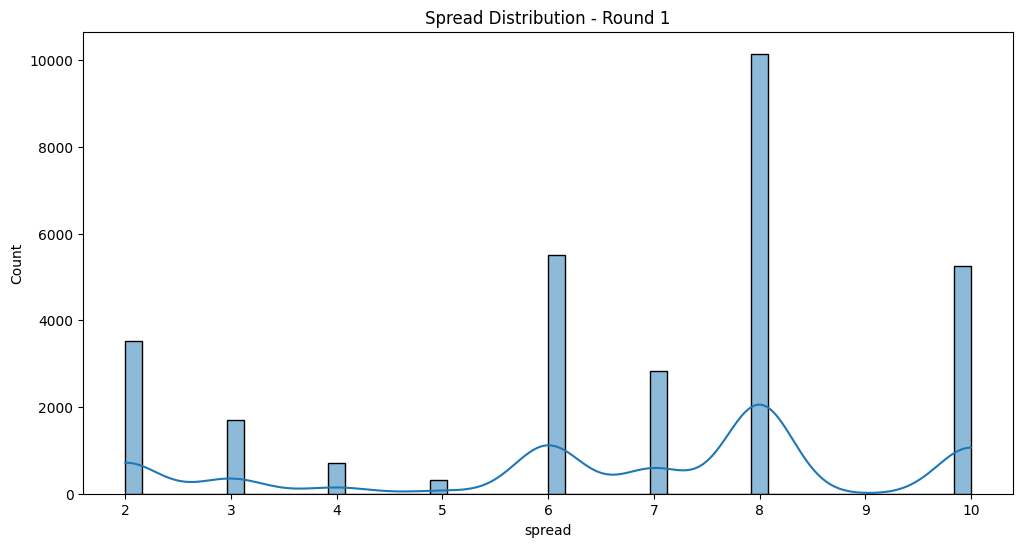

In [37]:
# PART 6: Statistical Visualization
plt.figure(figsize=(12, 6))
sns.histplot(ob['spread'], bins=50, kde=True)
plt.title('Spread Distribution - Round 1')
plt.show()



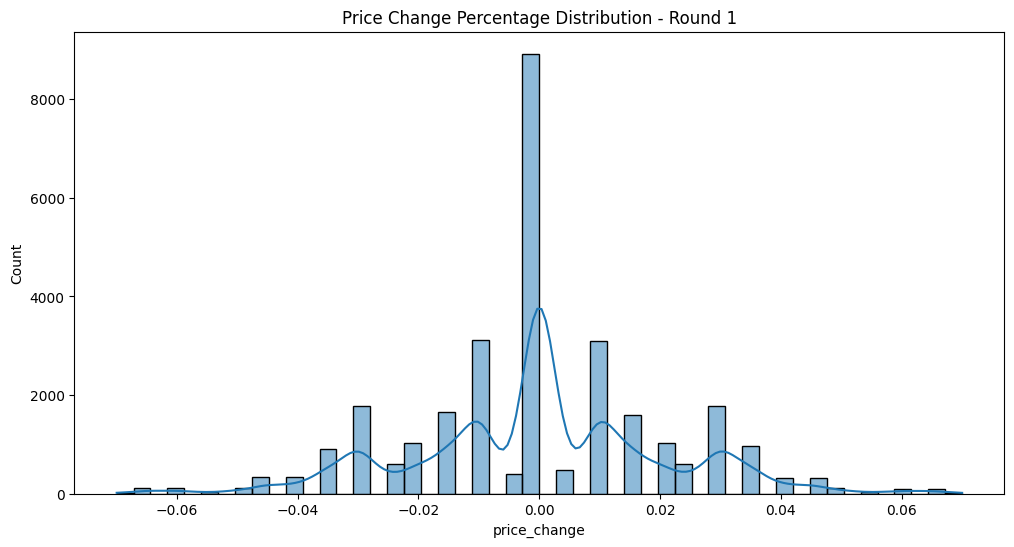

In [38]:
# PART 7: Price Volatility Analysis
ob['price_change'] = ob['mid'].pct_change() * 100
plt.figure(figsize=(12, 6))
sns.histplot(ob['price_change'].dropna(), bins=50, kde=True)
plt.title('Price Change Percentage Distribution - Round 1')
plt.show()
